In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Paso 4. Análisis exploratorio de datos (Python)

In [77]:
company_trips_df = pd.read_csv('moved_project_sql_result_01.csv')

In [79]:
company_trips_df.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [81]:
company_trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [83]:
company_trips_df.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [85]:
top_10_empresas_taxis = company_trips_df.sort_values('trips_amount', ascending = False).head(10)

In [87]:
top_10_empresas_taxis = top_10_empresas_taxis.set_index('company_name')

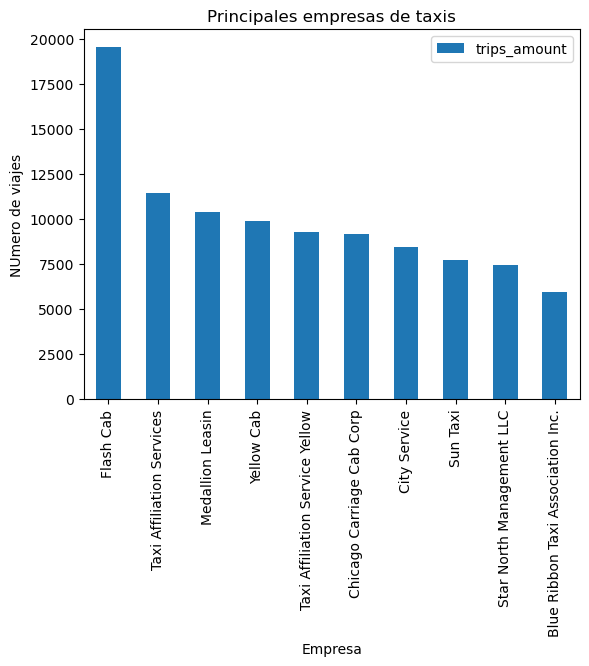

In [89]:
top_10_empresas_taxis.plot(kind = 'bar').set_title('Principales empresas de taxis')
plt.xlabel('Empresa')
plt.ylabel('NUmero de viajes')
plt.show()

* La empresa de taxis líder es Flash Cab con un 41% de ventas superior a la segunda empresa Taxi Affiliation Services.  

In [92]:
top_10_empresas_taxis

,trips_amount
company_name,
Flash Cab,19558
Taxi Affiliation Services,11422
Medallion Leasin,10367
Yellow Cab,9888
Taxi Affiliation Service Yellow,9299
Chicago Carriage Cab Corp,9181
City Service,8448
Sun Taxi,7701
Star North Management LLC,7455


In [94]:
dropoff_trips_df = pd.read_csv('moved_project_sql_result_04.csv')

In [96]:
dropoff_trips_df.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [98]:
dropoff_trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [100]:
dropoff_trips_df.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [102]:
dropoff_trips_df['average_trips'] = dropoff_trips_df.average_trips.astype('int')

In [104]:
top_10_barrios = dropoff_trips_df.sort_values('average_trips', ascending = False).head(10)

In [106]:
top_10_barrios = top_10_barrios.set_index('dropoff_location_name')

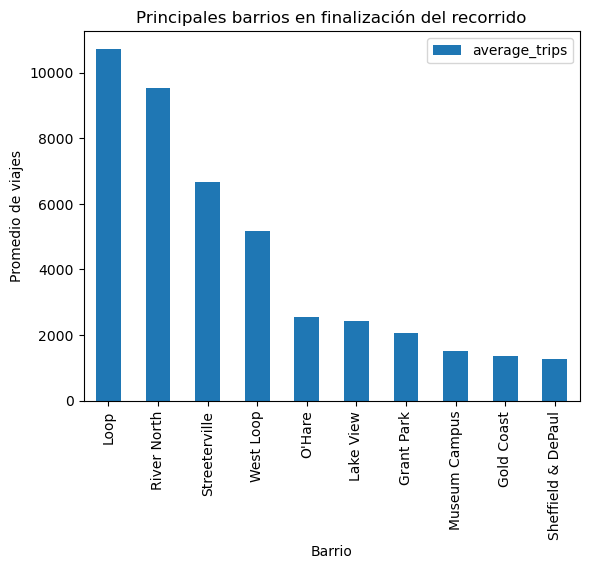

In [108]:
top_10_barrios.plot(kind = 'bar').set_title('Principales barrios en finalización del recorrido')
plt.xlabel('Barrio')
plt.ylabel('Promedio de viajes')
plt.show()

* El barrio líder en destino de finalización es Loop con un 11% de recorridos promedios superior al segundo barrio River North.

In [111]:
top_10_barrios

,average_trips
dropoff_location_name,
Loop,10727
River North,9523
Streeterville,6664
West Loop,5163
O'Hare,2546
Lake View,2420
Grant Park,2068
Museum Campus,1510
Gold Coast,1364


### Paso 5. Prueba de hipótesis (Python)

In [113]:
viajes_loop_aeropuerto = pd.read_csv ('moved_project_sql_result_07.csv')

In [115]:
viajes_loop_aeropuerto

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [117]:
viajes_loop_aeropuerto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


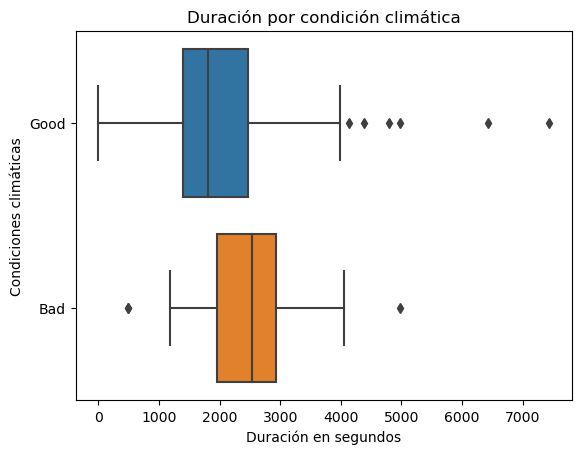

In [119]:
sns.boxplot( x = 'duration_seconds', y = 'weather_conditions', data = viajes_loop_aeropuerto ).set_title('Duración por condición climática')
plt.xlabel ('Duración en segundos')
plt.ylabel ('Condiciones climáticas')
plt.show()

Para analizar mejor los datos quitamos los ouliers (a nivel macro) ya que estos afectan los cuartiles.

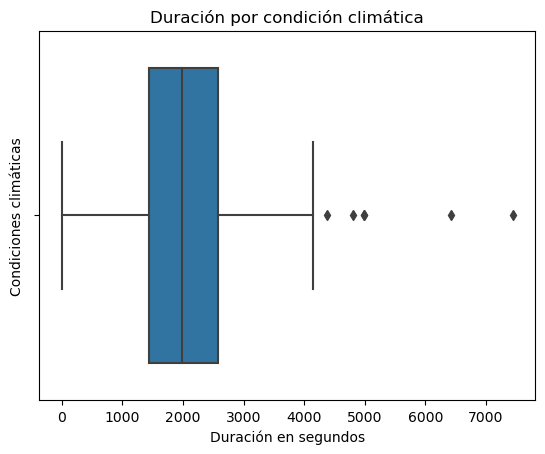

In [163]:
sns.boxplot( x = 'duration_seconds', data = viajes_loop_aeropuerto ).set_title('Duración por condición climática')
plt.xlabel ('Duración en segundos')
plt.ylabel ('Condiciones climáticas')
plt.show()

In [165]:
q01 = viajes_loop_aeropuerto['duration_seconds'].quantile(0.25)

In [167]:
q01

1438.25

In [169]:
q03 = viajes_loop_aeropuerto['duration_seconds'].quantile(0.75)

In [171]:
q03

2580.0

In [173]:
iqr = q03 - q01

In [175]:
iqr

1141.75

Los valores extremos son los que están a más de 1.5 veces el rango intercuartílico (IQR) de alguno de los cuartiles Q1 o Q3.

In [178]:
limite_inferior = q01 - (1.5*iqr)

In [180]:
limite_superior = q03 + (1.5*iqr)

In [182]:
datos_sin_outliers = viajes_loop_aeropuerto.query('duration_seconds <= @limite_superior')
datos_sin_outliers = datos_sin_outliers.query('duration_seconds >= @limite_inferior')

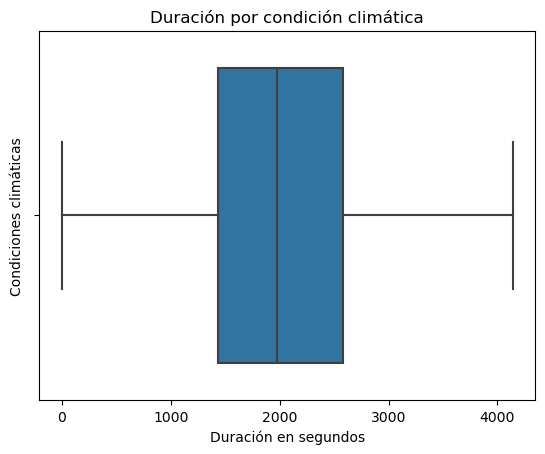

In [184]:
sns.boxplot( x = 'duration_seconds', data = datos_sin_outliers).set_title('Duración por condición climática')
plt.xlabel ('Duración en segundos')
plt.ylabel ('Condiciones climáticas')
plt.show()

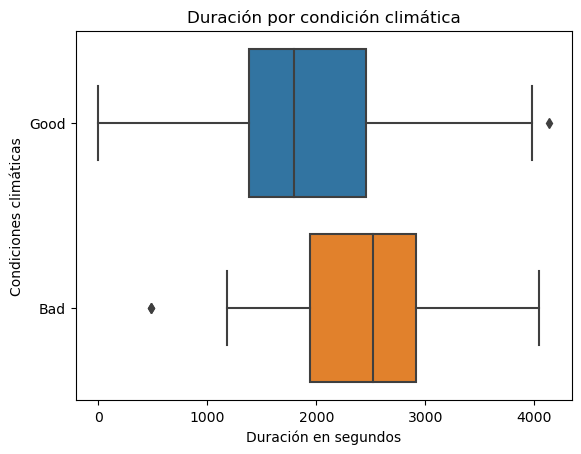

In [186]:
sns.boxplot( x = 'duration_seconds', y = 'weather_conditions', data = datos_sin_outliers).set_title('Duración por condición climática')
plt.xlabel ('Duración en segundos')
plt.ylabel ('Condiciones climáticas')
plt.show()

Prueba la hipótesis:

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

* Hipótesis nula:
La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es igual los sábados  lluviosos.

* Hipótesis alternativa:
La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es diferente los sábados  lluviosos.

In [237]:
from scipy import stats as st
viajes_buenas_condiciones = datos_sin_outliers.query('weather_conditions== "Good"')["duration_seconds"]
viajes_malas_condiciones = datos_sin_outliers.query('weather_conditions== "Bad"')["duration_seconds"]
alpha = 0.05
cambio_condiciones= st.ttest_ind(viajes_buenas_condiciones, viajes_malas_condiciones)
print("p-valor:", cambio_condiciones.pvalue)
if cambio_condiciones.pvalue < alpha:
    print("rechazamos la hipótesis nula")
else:
    print("no podemos rechazar la hipótesis nula")


p-valor: 1.2430038032744411e-13
rechazamos la hipótesis nula


Comprobamos que la varianza sea o no igual en ambas condiciones climáticas:

* Hipótesis nula:
Las varianzas de la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare son iguales en las dos condiciones climáticas.

* Hipótesis alternativa:
Las varianzas de la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no son iguales en las dos condiciones climáticas.

In [241]:
varianza_igual = st.levene(viajes_buenas_condiciones, viajes_malas_condiciones)

if varianza_igual.pvalue < alpha:
    print("rechazamos la hipótesis nula")
else:
    print("no podemos rechazar la hipótesis nula")

no podemos rechazar la hipótesis nula


En conclusión la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es diferente los sábados  lluviosos.